In [1]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.polynomial.polynomial as poly
import matplotlib
from matplotlib.backends.backend_pdf import PdfPages
from scipy import fftpack

In [2]:
path= '/home/hcapettini/Escritorio/HDD1TB/Tesis/Analísis/Mayo/'             
#path = '/media/adminpc/Hilario-2/Tesis/Analísis/Mayo/'

#simulacion='pulso_3' 
simulacion='desequilibrio_3' 

pathr=path+simulacion+'/'+simulacion
pathw=path

pos='_0.2_5.2_'
#pos='_1.5_20.0_'
#pos='_2.8_20.0_'
tmin =0
tmax =500

f_m = 0.5

In [3]:
with open( pathr+pos + 'velx.txt') as velx:
    velxlines = velx.readlines()[0:]
    time  = [float(line.split()[0]) for line in velxlines]
    velxx = [float(line.split()[1]) for line in velxlines]
with open( pathr+pos + 'vely.txt') as vely:
    velylines = vely.readlines()[0:]
    velyy = [float(line.split()[1]) for line in velylines]
    
with open( pathr+pos + 'magx.txt') as magx:
    magxlines = magx.readlines()[0:]
    magxx = [float(line.split()[1]) for line in magxlines]
    
with open( pathr+pos + 'magy.txt') as magy:
    magylines = magy.readlines()[0:]
    magyy = [float(line.split()[1]) for line in magylines]
    
with open( pathr+pos + 'dens.txt') as dens:
    denslines = dens.readlines()[0:]
    densy = [float(line.split()[1]) for line in denslines]
    
with open( pathr+pos + 'pres.txt') as pres:
    preslines = pres.readlines()[0:]
    presy = [float(line.split()[1]) for line in preslines]

In [4]:
velx = np.array(velxx)
vely = np.array(velyy)
magx = np.array(magxx)
magy = np.array(magyy)
dens = np.array(densy)
pres = np.array(presy)
time = np.array(time)

In [27]:
variable = dens
var ='dens'

In [46]:
variable = pres
var ='pres'

In [59]:
variable = velx
var ='velx'

In [71]:
variable = vely
var ='vely'

In [82]:
variable = magx
var ='magx'

In [92]:
variable = magy
var ='magy'

No handles with labels found to put in legend.


Text(0.5, 0, 'Tiempo [s]')

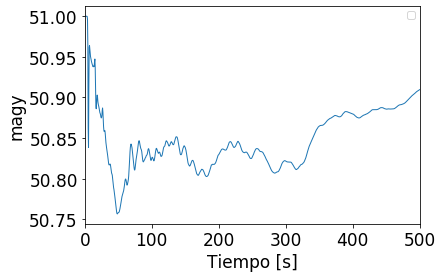

In [93]:
plt.plot(time,variable,label=pos, linewidth=1)
plt.legend()
plt.xlim(tmin, tmax)
#plt.ylim(densmin,densmax)
plt.tick_params( labelsize=17)
plt.ylabel(var,fontsize=17)  
plt.xlabel('Tiempo [s]',fontsize=17)

In [94]:
nmin_FT = np.int(tmin/f_m)
nmax_FT = np.int(tmax/f_m)

In [95]:
variable_FT = variable[nmin_FT:nmax_FT]
time_FT = time[nmin_FT:nmax_FT]

In [96]:
p = np.poly1d(np.polyfit(time_FT, variable_FT, 1))

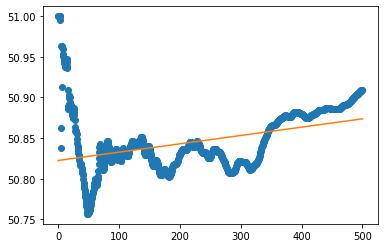

In [97]:
t = np.linspace(tmin, tmax, np.size(time_FT))
plt.plot(time_FT, variable_FT, 'o', t, p(t), '-')
plt.show()

In [98]:
variable_FT = variable_FT-p(t)

In [99]:
from scipy import fftpack

FT = fftpack.fft(variable_FT)
freqs = fftpack.fftfreq(len(variable_FT), d=f_m) 

data = np.array([np.abs(freqs), np.abs(FT)]) #Le tengo que poner un abs a la fcuencia porque sino me repite lo mismo en frecuencias negativas y en FT para eliminar el temrino complejo
data = data.T
datafile_path = pathw + simulacion + '/'+simulacion+pos+'TF_'+str(tmin)+'_'+str(tmax)+'_'+var+'.txt'
with open(datafile_path, 'w+') as datafile_id:
    np.savetxt(datafile_id, data)

Text(0.5, 0, 'Frecuencia [Hz]')

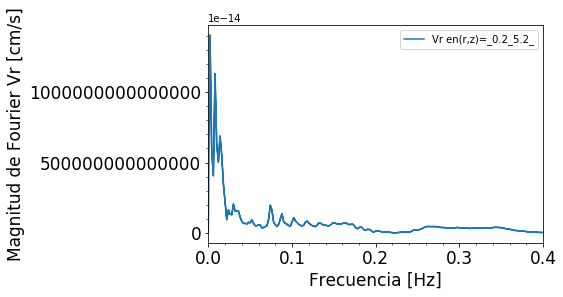

In [100]:
plt.plot(np.abs(freqs), np.abs(FT),label='Vr en'+''+'(r,z)='+pos)
plt.legend()
plt.xlim(0, 0.4)
plt.ticklabel_format(axis="y", style="sci", scilimits=(-14,-14))
plt.tick_params( labelsize=17)
plt.minorticks_on()
plt.ylabel('Magnitud de Fourier Vr [cm/s]',fontsize=17) 
plt.xlabel('Frecuencia [Hz]',fontsize=17)
#plt.savefig(path+'vz.pdf', bbox_inches='tight') 